### Packt > 
#### The Data Analysis Workshop

### Absenteeism at Work

#### Distribution analysis, Hypothesis testing, and Conditional probability estimation

In this chapter, you will perform standard data analysis techniques, such as estimating **conditional probabilities**, **Bayes' theorem**, and **Kolmogorov-Smirnov tests**, for distribution comparison. You will also implement data transformation techniques, such as the **Box-Cox** and **Yeo-Johnson** transformations, and apply these techniques to a given dataset.

We'll analyze absenteeism data from a Brazilian courier company, collected between July 2007 and July 2010.

[Dataset source](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work)


<details>
<summary>Attribute information:</summary>

1 - Individual identification (ID) 

2 - Reason for absence (ICD). 

1. Certain infectious and parasitic diseases 
2. Neoplasms 
3. Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism 
4. Endocrine, nutritional and metabolic diseases 
5. Mental and behavioural disorders 
6. Diseases of the nervous system 
7. Diseases of the eye and adnexa 
8. Diseases of the ear and mastoid process 
9. Diseases of the circulatory system 
10. Diseases of the respiratory system 
11. Diseases of the digestive system 
12. Diseases of the skin and subcutaneous tissue 
13. Diseases of the musculoskeletal system and connective tissue 
14. Diseases of the genitourinary system 
15. Pregnancy, childbirth and the puerperium 
16. Certain conditions originating in the perinatal period 
17. Congenital malformations, deformations and chromosomal abnormalities 
18. Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified 
19. Injury, poisoning and certain other consequences of external causes 
20. External causes of morbidity and mortality 
21. Factors influencing health status and contact with health services. 

And 7 categories without (CID):
    
22. patient follow-up
23. medical consultation
24. blood donation
25. laboratory examination
26. unjustified absence
27. physiotherapy
28. dental consultation.

3 - Month of absence 

4 - Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)) 

5 - Seasons (summer (1), autumn (2), winter (3), spring (4)) 

6 - Transportation expense 

7 - Distance from Residence to Work (kilometers) 

8 - Service time 

9 - Age 

10 - Work load Average/day 

11 - Hit target 

12 - Disciplinary failure (yes=1; no=0) 

13 - Education (high school (1), graduate (2), postgraduate (3), master and doctor (4)) 

14 - Son (number of children) 

15 - Social drinker (yes=1; no=0) 

16 - Social smoker (yes=1; no=0) 

17 - Pet (number of pet) 

18 - Weight 

19 - Height 

20 - Body mass index 

21 - Absenteeism time in hours (target) </details>

**Our goal is to discover hidden patterns in the data, which might be useful for distinguishing genuine work absences from fraudulent ones.**

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Initial data analysis

In [66]:
data_path = 'https://raw.githubusercontent.com/PacktWorkshops/'\
            'The-Data-Analysis-Workshop/master/Chapter02/data/Absenteeism_at_work.csv'
data = pd.read_csv(data_path, sep=';')
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [67]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               740 non-null    int64  
 1   reason_for_absence               740 non-null    int64  
 2   month_of_absence                 740 non-null    int64  
 3   day_of_the_week                  740 non-null    int64  
 4   seasons                          740 non-null    int64  
 5   transportation_expense           740 non-null    int64  
 6   distance_from_residence_to_work  740 non-null    int64  
 7   service_time                     740 non-null    int64  
 8   age                              740 non-null    int64  
 9   work_load_average/day_           740 non-null    float64
 10  hit_target                       740 non-null    int64  
 11  disciplinary_failure             740 non-null    int64  
 12  education             

In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
reason_for_absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
month_of_absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
day_of_the_week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
transportation_expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
distance_from_residence_to_work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
service_time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
work_load_average/day_,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


As we can see, some of the columns, such as Month of absence, Day of the week, Seasons, Education, Disciplinary failure, Social drinker, and Social smoker, are encoding categorical values.

We can back-transform the numerical values to their original categories so that we have better plotting features.

In [70]:
month_encoding = {1: 'January', 2: 'February', 3: 'March', \
                  4: 'April', 5: 'May', 6: 'June', 7: 'July', \
                  8: 'August', 9: 'September', 10: 'October', \
                  11: 'November', 12: 'December', 0: 'Unknown'}
dow_encoding = {2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', \
                5: 'Thursday', 6: 'Friday'}
season_encoding = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
education_encoding = {1: 'high_school', 2: 'graduate', \
                      3: 'postgraduate', 4: 'master_phd'}
yes_no_encoding = {0: 'No', 1: 'Yes'}

In [71]:
preprocessed_data = data.copy()

preprocessed_data.month_of_absence = preprocessed_data.month_of_absence.apply(lambda x: month_encoding[x])
preprocessed_data.day_of_the_week = preprocessed_data.day_of_the_week.apply(lambda x: dow_encoding[x])
preprocessed_data.seasons = preprocessed_data.seasons.apply(lambda x: season_encoding[x])
preprocessed_data.education = preprocessed_data.education.apply(lambda x: education_encoding[x])

preprocessed_data.disciplinary_failure = preprocessed_data.disciplinary_failure.apply(lambda x: yes_no_encoding[x])
preprocessed_data.social_drinker = preprocessed_data.social_drinker.apply(lambda x: yes_no_encoding[x])
preprocessed_data.social_smoker = preprocessed_data.social_smoker.apply(lambda x: yes_no_encoding[x])

preprocessed_data.head().T

,0,1,2,3,4
id,11,36,3,7,11
reason_for_absence,26,0,23,7,23
month_of_absence,July,July,July,July,July
day_of_the_week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
seasons,Spring,Spring,Spring,Spring,Spring
transportation_expense,289,118,179,279,289
distance_from_residence_to_work,36,13,51,5,36
service_time,13,18,18,14,13
age,33,50,38,39,33
work_load_average/day_,239.554,239.554,239.554,239.554,239.554


# Identifying reasons for absence

Create a new variable, called `Disease`, which indicates whether a specific reason for absence is present in the ICD (International Code of Diseases) table or not.

In [72]:
preprocessed_data['disease'] = \
                preprocessed_data.reason_for_absence.\
                apply(lambda x: np.where((x>=1) and (x<=21), 'Yes', 'No'))

In [73]:
preprocessed_data[['reason_for_absence', 'disease']]

,reason_for_absence,disease
0,26,No
1,0,No
2,23,No
3,7,Yes
4,23,No
...,...,...
735,14,Yes
736,11,Yes
737,0,No
738,0,No


Use bar plots in order to compare the absences due to disease reasons:

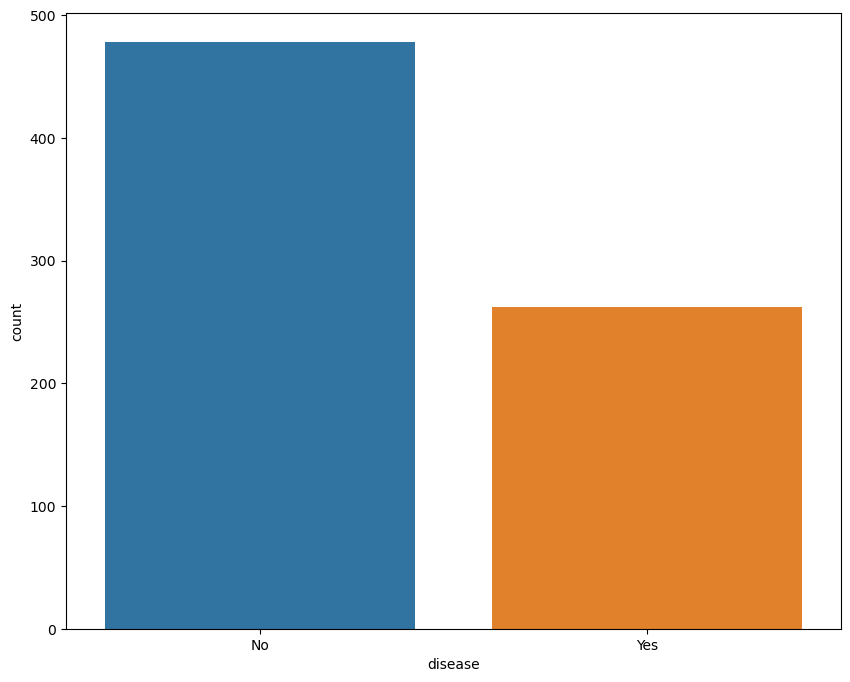

In [74]:
plt.figure(figsize=(10, 8))
sns.countplot(data=preprocessed_data, x='disease')
plt.savefig('figs/disease_plot.png', format='png', dpi=300)

Let's start with a simple analysis of the Reason for absence column. We will try to address questions such as, what is the most common reason for absence? Does being a drinker or smoker have some effect on the causes? Does the distance to work have some effect on the reasons? And so on.

The first thing we are interested in is the overall distribution of the absence reasons
in the data—that is, how many entries we have for a specific reason for absence in
our dataset.

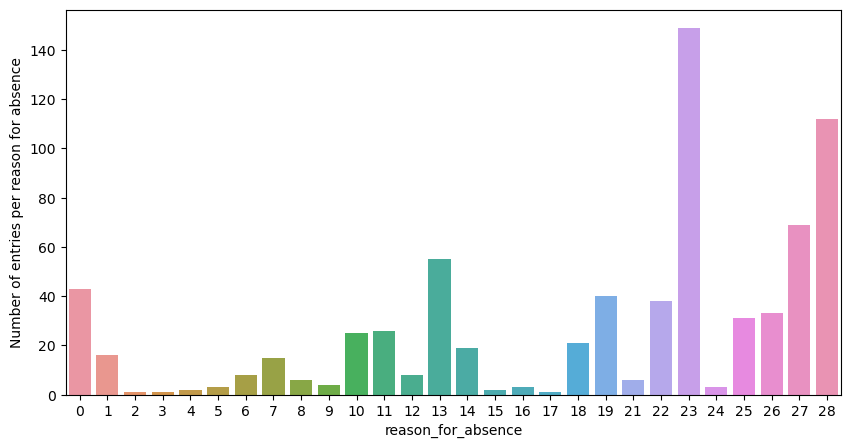

In [75]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=preprocessed_data, x='reason_for_absence')
ax.set_ylabel('Number of entries per reason for absence')
plt.savefig('figs/absence_reasons_distributions.png', format='png', dpi=300)

We can assert that the most frequent reasons
for absence are related to medical consultations (23), dental consultations (28),
and physiotherapy (27). On the other hand, the most frequent reasons for absence
encoded in the ICD encoding are related to diseases of the musculoskeletal system
and connective tissue (13) and injury, poisoning, and certain other consequences of
external causes (19).

Let's investigate the impact of the various features on the reason for absence and absenteeism in hours. 

# Analysis of social drinkers and smokers

As smoking and frequent drinking have a negative impact on health
conditions, we would expect that certain diseases are more frequent in smokers and
drinkers than others. Note that in the absenteeism dataset, 56% of the registered
employees are drinkers, while only 7% are smokers.

In [76]:
preprocessed_data.social_drinker.value_counts(normalize=True)

Yes    0.567568
No     0.432432
Name: social_drinker, dtype: float64

In [77]:
preprocessed_data.social_smoker.value_counts(normalize=True)

No     0.927027
Yes    0.072973
Name: social_smoker, dtype: float64

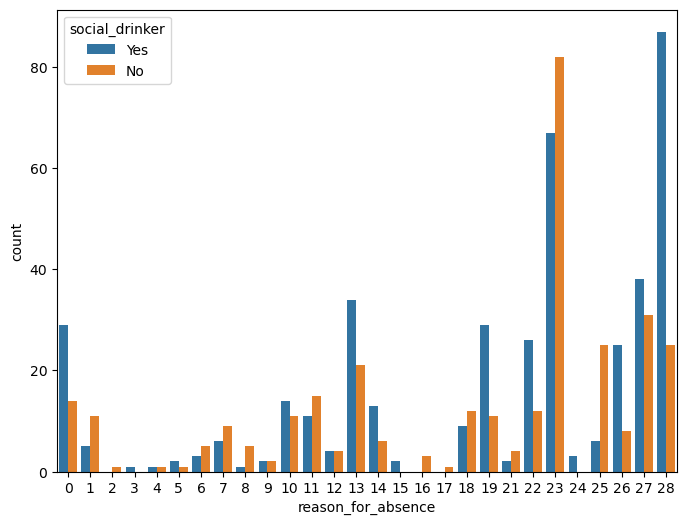

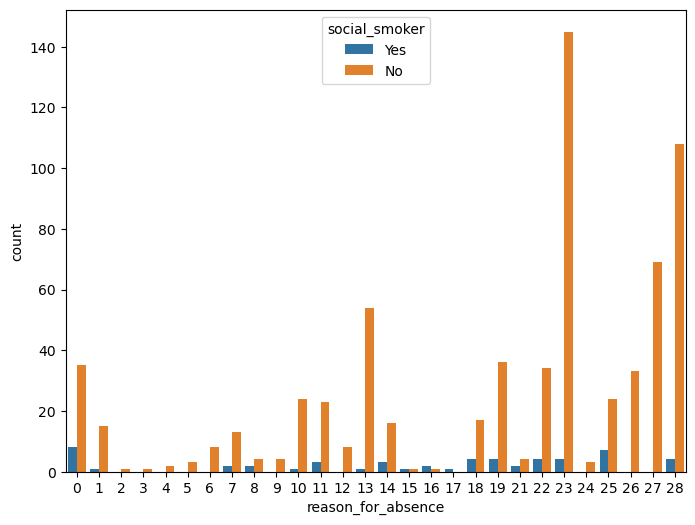

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(data=preprocessed_data, x='reason_for_absence', hue='social_drinker', hue_order=['Yes', 'No'])
plt.savefig('figs/absence_reasons_drinkers.png', format='png', dpi=300)
plt.figure(figsize=(8, 6))
sns.countplot(data=preprocessed_data, x='reason_for_absence', hue='social_smoker', hue_order=['Yes', 'No'])
plt.savefig('figs/absence_reasons_smokers.png', format='png', dpi=300)

As we can see from the resulting plots, a significant difference between drinkers and non-drinkers can be observed in absences related to Dental consultations (28). Furthermore, as the number of social smokers is quite small (only 7% of the entries), it is very hard to say whether there is actually a relationship between the absence reasons and smoking. A more rigorous approach in this direction would be to analyze the **conditional probabilities** of the different absence reasons, which are based on being a social drinker or smoker.

![cond_prob_formula](../../img/pictures/cond_prob_formula.png)

**The conditional probability means that the probability of A given B is equal to the probability of A and B
both happening, divided by the probability of B happening (with the unconditional probability of B being greater than zero P(B) > 0).**

1. First compute the unconditional probabilities of being a social drinker or smoker. Verify that both the probabilities are greater than zero, as they appear in the denominator of the conditional probabilities.
 
**P(social drinker)** = number of social drinkers / total number of entries (total)

**P(social smoker)** = number of social smokers / total number of entries (total)

In [79]:
drinker_prob = preprocessed_data.social_drinker.value_counts(normalize=True)['Yes']
smoker_prob = preprocessed_data.social_smoker.value_counts(normalize=True)['Yes']
print(f'P(social drinker) = {drinker_prob:.3f} | P(social smoker) = {smoker_prob:.3f}')

P(social drinker) = 0.568 | P(social smoker) = 0.073


2. Next, compute the probabilities of being a social drinker/smoker and being absent for each reason of absence.

**P(social drinker and absent for reason R1)** = number of social drinkers absent for reason R1 / total

**P(social smoker and absent for reason R1)** = number of social smokers absent for reason R1 / total

3. In order to carry the required computations, define masks in the data, which only account for entries where employees are drinkers or smokers:

In [80]:
drinker_mask = preprocessed_data.social_drinker == 'Yes'
smoker_mask = preprocessed_data.social_smoker == 'Yes'

4. Compute the total number of entries and the number of absence reasons, masked by drinkers/smokers:

In [81]:
total_entries = preprocessed_data.shape[0]
absence_drinker_prob = preprocessed_data.reason_for_absence[drinker_mask].value_counts() / total_entries
absence_smoker_prob = preprocessed_data.reason_for_absence[smoker_mask].value_counts() / total_entries

5. Compute the conditional probabilities by dividing the computed probabilities for each reason of absence in Step 2 by the unconditional probabilities obtained in Step 1:

In [82]:
cond_prob = pd.DataFrame(index=range(0,29))
cond_prob['P(Absence | social drinker)'] = absence_drinker_prob / drinker_prob
cond_prob['P(Absence | social smoker)'] = absence_smoker_prob / smoker_prob

In [83]:
cond_prob

,P(Absence | social drinker),P(Absence | social smoker)
0,0.069048,0.148148
1,0.011905,0.018519
2,NaN,NaN
3,0.002381,NaN
4,0.002381,NaN
5,0.004762,NaN
6,0.007143,NaN
7,0.014286,0.037037
8,0.002381,0.037037
9,0.004762,NaN


<Figure size 640x480 with 0 Axes>

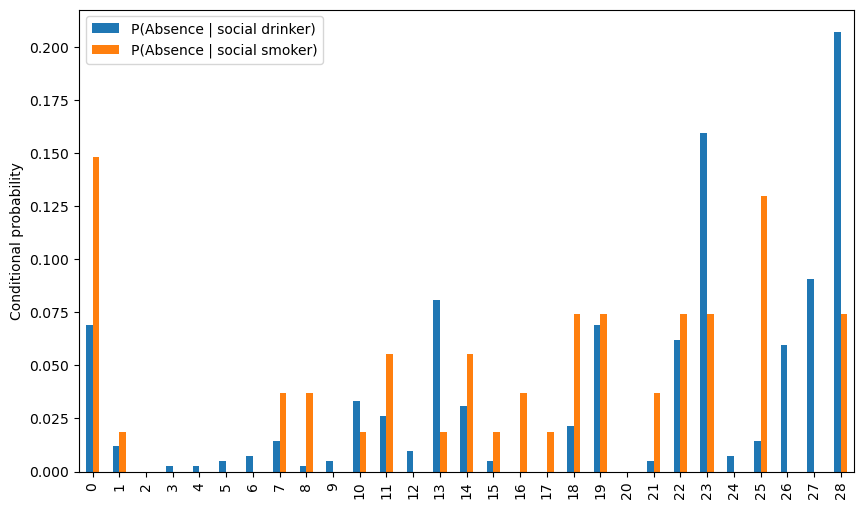

In [84]:
plt.figure()
ax = cond_prob.plot.bar(figsize=(10,6))
ax.set_ylabel('Conditional probability')
plt.savefig('figs/conditional_probabilities.png', format='png', dpi=300)

As we can observe from the previous plot, the highest reason for absence for drinkers is dental consultations (28), followed by medical consultations (23). Smokers' absences, however, are mostly due to unknown reasons (0) and laboratory examinations (25).

Due to the nature of the problem, computing conditional probabilities might be difficult, or we may only have one
conditional probability (say, P(A|B)) where we actually need P(B|A). In these cases, the Bayesian theorem can be used.

## Identifying the Probability of Being a Drinker/Smoker, Conditioned to Absence Reason

Let's apply **Bayes' theorem** to our dataset. In addition to applying Bayes' theorem, we will also be using the Kolmogorov-Smirnov test. 

![bayesan_formula](../../img/pictures/bayesan_formula.png)

**The Kolmogorov-Smirnov test** is used to determine whether two samples are statistically
different from each other, i.e. whether or not they follow the same distribution.

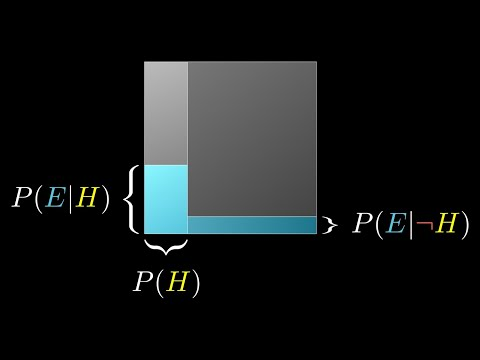

In [85]:
from IPython.display import YouTubeVideo
YouTubeVideo('_bcAK_1a72k', width=700, height=400)

We want to compute the probabilities of an employee being a social drinker P(social drinker |Ri), or smoker P(social smoker |Ri), conditioned to an absence reason Ri, as follows:

**P(social drinker |Ri) = (P(Ri | social drinker)P(social drinker)) / P(Ri)**

**P(social smoker |Ri) = (P(Ri | social smoker)P(social smoker)) / P(Ri)**

We already computed some variables for these formulas:

- P(Ri | social drinker) = `cond_prob['P(Absence | social drinker)']` (a Series, index=[0:28]
- P(Ri | social smoker) = `cond_prob['P(Absence | social smoker)']` (a Series, index=[0:28]
- P(social drinker) = `drinker_prob (a scalar)`
- P(social smoker) = `smoker_prob (a scalar)`

So we only need to compute P(Ri) for each reason of absence R_i.

In [88]:
# compute reason for absence probabilities
absence_prob = preprocessed_data.reason_for_absence.value_counts(normalize=True)
absence_prob 

23    0.201351
28    0.151351
27    0.093243
13    0.074324
0     0.058108
19    0.054054
22    0.051351
26    0.044595
25    0.041892
11    0.035135
10    0.033784
18    0.028378
14    0.025676
1     0.021622
7     0.020270
6     0.010811
12    0.010811
21    0.008108
8     0.008108
9     0.005405
5     0.004054
16    0.004054
24    0.004054
15    0.002703
4     0.002703
3     0.001351
2     0.001351
17    0.001351
Name: reason_for_absence, dtype: float64

<Figure size 640x480 with 0 Axes>

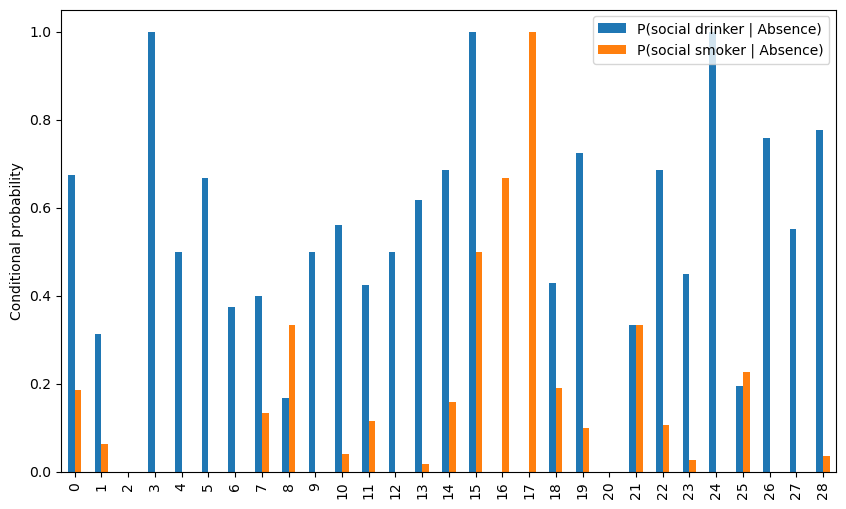

In [89]:
# compute conditional probabilities for drinker/smoker

cond_prob_drinker_smoker = pd.DataFrame(index=range(0,29))
cond_prob_drinker_smoker['P(social drinker | Absence)'] =\
                        cond_prob['P(Absence | social drinker)'] * drinker_prob / absence_prob
cond_prob_drinker_smoker['P(social smoker | Absence)'] =\
                        cond_prob['P(Absence | social smoker)'] * smoker_prob / absence_prob

plt.figure()
ax = cond_prob_drinker_smoker.plot.bar(figsize=(10,6))
ax.set_ylabel('Conditional probability')
plt.savefig('figs/conditional_probabilities_drinker_smoker.png', format='png', dpi=300)

As you can see from the resulting plot, the conditional probabilities of being a social drinker/smoker are quite high, once an absence with a certain reason occurs. This is due to the fact that the number of entries is very small; as such, if all the registered employees who were absent for a certain reason are smokers, the probability of being a smoker, once that reason has been registered, will be equal to one (based on the available data).

To complete the analysis on the social drinkers and smokers, analyze the distribution of the hours of absenteeism based on the two classes (being a social drinker/smoker versus not being). A useful type of plot for this type
of comparison is the **violin plot**.

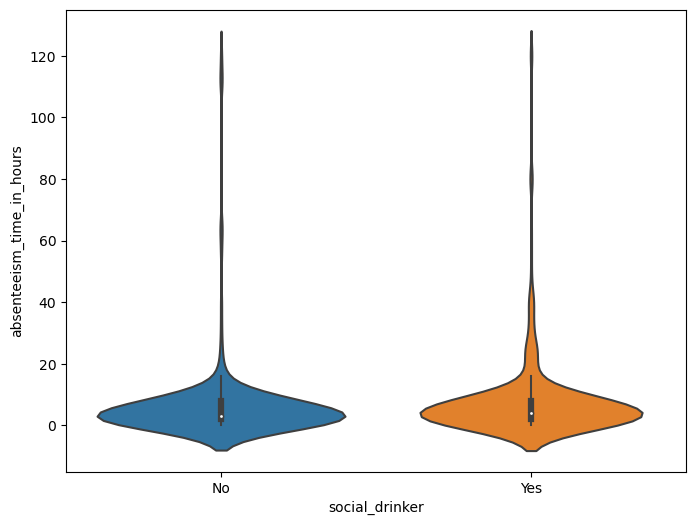

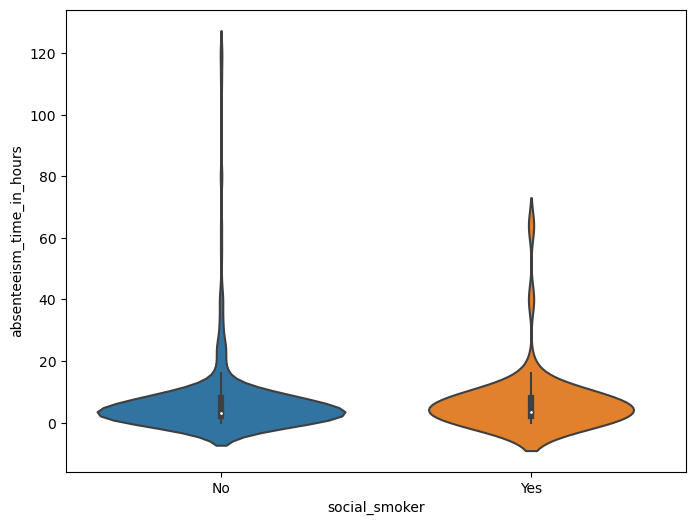

In [91]:
plt.figure(figsize=(8,6))
sns.violinplot(x='social_drinker', y='absenteeism_time_in_hours', data=preprocessed_data, order=['No', 'Yes'])
plt.savefig('figs/drinkers_hour_distribution.png', format='png', dpi=300)
plt.figure(figsize=(8,6))
sns.violinplot(x='social_smoker', y='absenteeism_time_in_hours', data=preprocessed_data, order=['No', 'Yes'])
plt.savefig('figs/smokers_hour_distribution.png', format='png', dpi=300)

As it can be observed from figures, despite some differences in the outliers between smokers and non-smokers, **there is no substantial difference in the distribution of absenteeism hours in drinkers and smokers**.

To assess this statement in a rigorous statistical way, perform **hypothesis testing** on the absenteeism hours (with a null hypothesis stating that the average absenteeism time in hours is the same for drinkers and non-drinkers).

In [94]:
from scipy.stats import ttest_ind

hours_col = 'absenteeism_time_in_hours'

# test mean absenteeism time for drinkers
drinkers_mask = preprocessed_data['social_drinker'] == 'Yes'
hours_drinkers = preprocessed_data.loc[drinkers_mask, hours_col]
hours_non_drinkers = preprocessed_data.loc[~drinkers_mask, hours_col]
drinkers_test = ttest_ind(hours_drinkers, hours_non_drinkers)
print(f'Statistics value: {drinkers_test[0]}, p-value: {drinkers_test[1]}')

Statistics value: 1.7713833295243993, p-value: 0.07690961828294651


In [95]:
# perform same test for smokers

smokers_mask = preprocessed_data.social_smoker == 'Yes'
hours_smokers = preprocessed_data.loc[smokers_mask, hours_col]
hours_non_smokers = preprocessed_data.loc[~smokers_mask, hours_col]
smokers_test = ttest_ind(hours_smokers, hours_non_smokers)
print(f'Statistics value: {smokers_test[0]}, p-value: {smokers_test[1]}')

Statistics value: -0.24277795417700243, p-value: 0.8082448720154971


As you can see, the p-value of both tests is above the critical value of 0.05, which means that you cannot reject the null hypothesis. In other words, you cannot say that there is a statistically significant difference in the absenteeism hours between drinkers (and smokers) and non-drinkers (and non-smokers).

Nevertheless, the average hours may still be equal, but their distributions may be different. Perform a **Kolmogorov-Smirnov test** to assess the difference in the distributions of two samples.

In [96]:
from scipy.stats import ks_2samp

ks_drinkers = ks_2samp(hours_drinkers, hours_non_drinkers)
ks_smokers = ks_2samp(hours_smokers, hours_non_smokers)

print(f'Drinkers comparison: statistics={ks_drinkers[0]:.3f}, pvalue={ks_drinkers[1]:.3f}')
print(f'Smokers comparison: statistics={ks_smokers[0]:.3f}, pvalue={ks_smokers[1]:.3f}')

Drinkers comparison: statistics=0.135, pvalue=0.002
Smokers comparison: statistics=0.104, pvalue=0.607


The p-value for the drinkers dataset is lower than the critical 0.05, which is **strong evidence against the null hypothesis of the two distributions being equal**. On the other hand, as the p-value for the smokers dataset is higher than 0.05, **you cannot reject the null hypothesis**.

# Body Mass Index

The Body Mass Index (BMI) is defined as a person's weight in kilograms, divided by the square of their height in meters:

BMI = weight[kg] / height[m]**2

We can build the four categories (underweight, healthy weight, overweight, and obese) based on the BMI values.

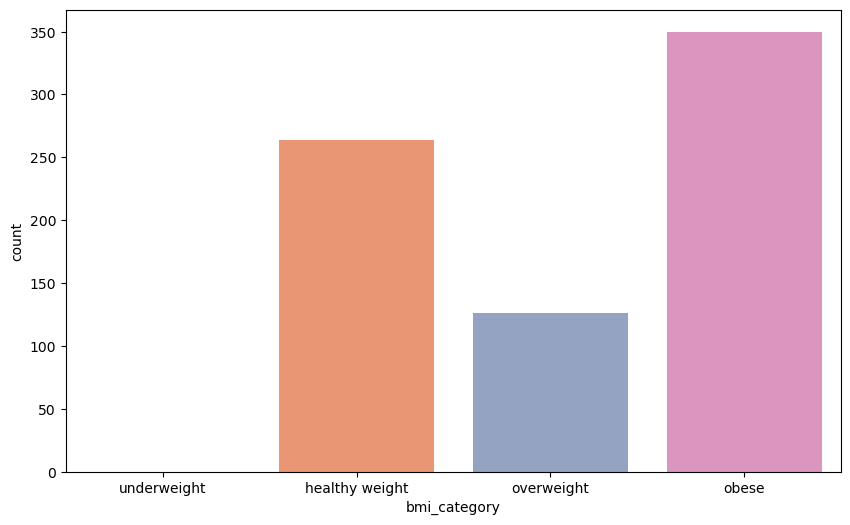

In [97]:
"""
define function for computing the BMI category, based on BMI value
"""

def get_bmi_category(bmi):
    if bmi < 18.5:
        category = 'underweight'
    elif bmi >=18.5 and bmi < 25:
        category = 'healthy weight'
    elif bmi <=25 and bmi < 30:
        category = 'overweight'
    else:
        category = 'obese'
    return category

# compute BMI category
preprocessed_data['bmi_category'] = preprocessed_data.body_mass_index.apply(get_bmi_category)

plt.figure(figsize=(10,6))
sns.countplot(data=preprocessed_data, x='bmi_category',\
              order=['underweight', 'healthy weight', 'overweight', 'obese'], palette='Set2')
plt.savefig('figs/bmi_categories.png', format='png', dpi=300)

Now, let's check how the different BMI categories are related to the reason for absence. More precisely, we would like to see how many employees there are based on their body mass index and their reason for absence.

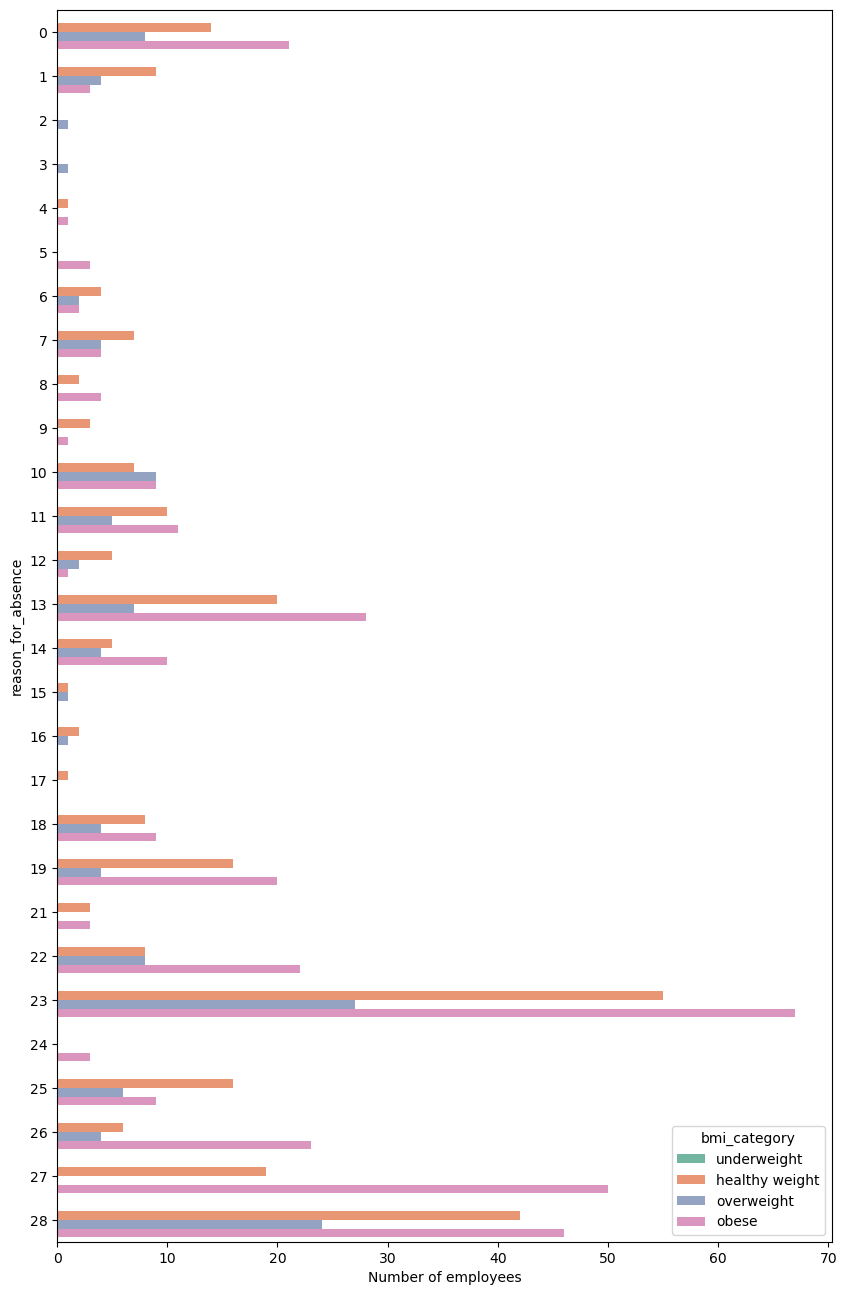

In [98]:
plt.figure(figsize=(10,16))
ax = sns.countplot(data=preprocessed_data, y='reason_for_absence', hue='bmi_category',\
                  hue_order=['underweight', 'healthy weight', 'overweight', 'obese'], palette='Set2')
ax.set_xlabel('Number of employees')
plt.savefig('figs/reasons_bmi.png', format='png', dpi=300)

Unfortunately, no clear pattern arises from the preceding plot. In other words, for each reason for absence, an (almost) equal number of employees with different body mass indexes are present.

We can also investigate the distribution of absence hours for the different BMI categories.

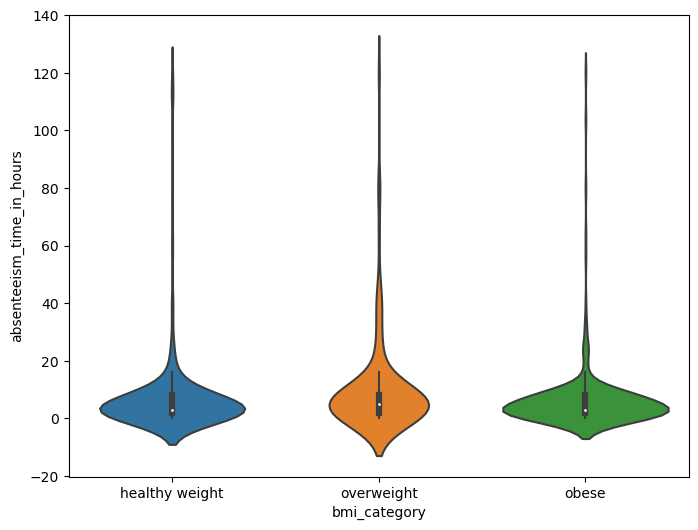

In [100]:
# plot distribution of absence time, based on BMI category
plt.figure(figsize=(8,6))
sns.violinplot(x='bmi_category', y='absenteeism_time_in_hours', data=preprocessed_data, \
               order=['healthy weight', 'overweight', 'obese'])
plt.savefig('figs/bmi_hour_distribution.png', format='png')

As we can observe from figures, no evidence states that BMI and obesity levels influence the employees' absenteeism.

# Age and Education Factors

Age and education may also influence employees' absenteeism. For instance, older employees might need more frequent medical treatment, while employees with higher education degrees, covering positions of higher responsibility, might be less prone to being absent.

First, let's investigate the **correlation** between age and absence hours. We will create a **regression plot**, in which we'll plot the Age column on the x axis and Absenteeism time in hours on the y axis. We'll also include the **Pearson's correlation coefficient** and its **p-value**, where the null hypothesis is that the correlation coefficient between the two features is equal to zero.

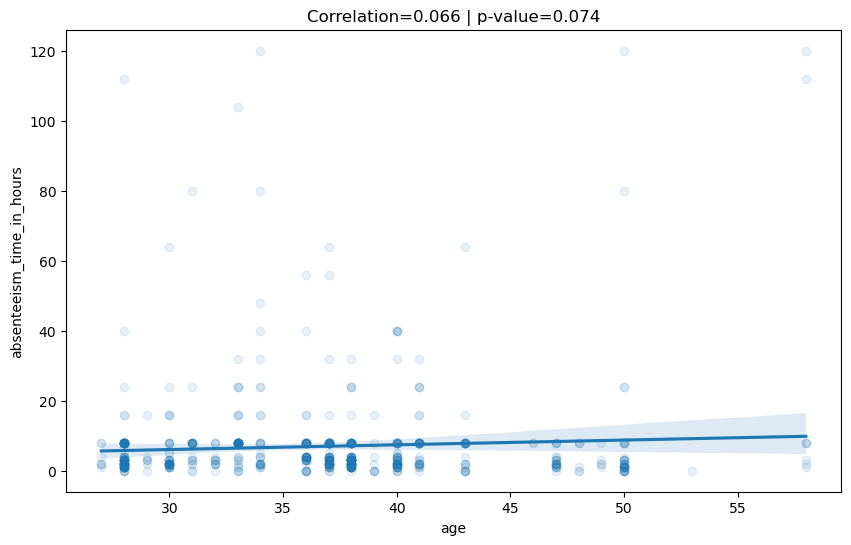

In [101]:
from scipy.stats import pearsonr

# compute Pearson's correlation coefficient and p-value
pearson_test = pearsonr(preprocessed_data.age, preprocessed_data.absenteeism_time_in_hours)

"""
create regression plot and add correlation coefficient in the title
"""
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='age', y='absenteeism_time_in_hours', data=preprocessed_data, scatter_kws={"alpha":0.1})
ax.set_title(f'Correlation={pearson_test[0]:.03f} | p-value={pearson_test[1]:.03f}')
plt.savefig('figs/correlation_age_hours.png', format='png', dpi=300)

As we can observe from the resulting plot, no significant pattern occurs. Furthermore, **the correlation coefficient is extremely small (0.066)**, and its **p-value is above the threshold of 0.05**, which is an additional indicator that **no relationship is present between the Age and Absenteeism time in hours features**.

We can also check whether age has some impact on the reason for absence.

## Investigating the Impact of Age on Reason for Absence

We'll investigate the relationship between the Age feature and the various reasons for absence.

First, create a violin plot between the Age and Disease features. This will give you your first insight into the relationship between the two columns.

<AxesSubplot:xlabel='disease', ylabel='age'>

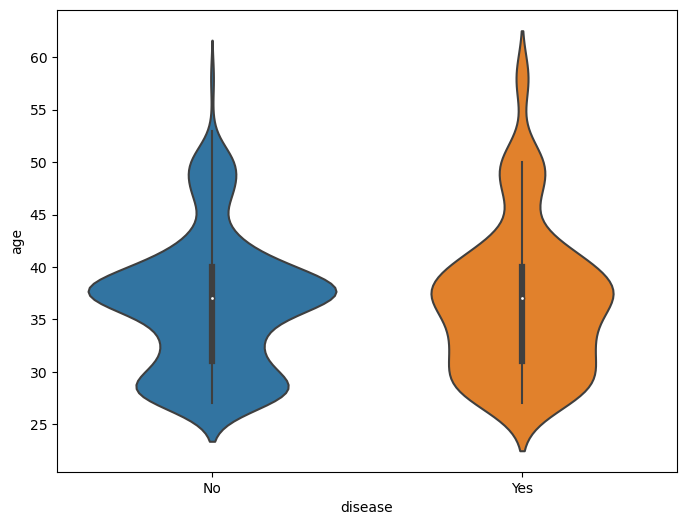

In [102]:
# create violin plot between the Age and Disease columns
plt.figure(figsize=(8,6))
sns.violinplot(x='disease', y='age', data=preprocessed_data)

You can see some differences between the two distributions of age. In fact, for samples with ICD encoded reasons for absence (labeled Yes in the Disease column), you can observe that slightly more samples are present for older employees. To confirm this difference in distributions, perform hypothesis tests on the means and distributions of the two groups.

In [103]:
"""
get Age entries for employees with Disease == Yes and Disease == No
"""

disease_mask = preprocessed_data.disease =='Yes'
disease_ages = preprocessed_data.age[disease_mask]
no_disease_ages = preprocessed_data.age[~disease_mask]

# perform hypothesis test for equality of means
test_res = ttest_ind(disease_ages, no_disease_ages)
print(f'Test for equality of means: statistics={test_res[0]:.3f}, pvalue={test_res[1]:.3f}')

# test equality of distributions via Kolmogorov-Smirnov test   
ks_res = ks_2samp(disease_ages, no_disease_ages)
print(f'KS test for equality of distributions: statistics={ks_res[0]:.3f}, pvalue={ks_res[1]:.3f}')

Test for equality of means: statistics=0.630, pvalue=0.529
KS test for equality of distributions: statistics=0.057, pvalue=0.619


From the results of the two tests, you can conclude that there is no statistically significant difference between the two distributions. Thus, age is neither an indicator for the length of an absence nor for its type.

Now investigate the relationship between age and reason for absence.

<AxesSubplot:xlabel='reason_for_absence', ylabel='age'>

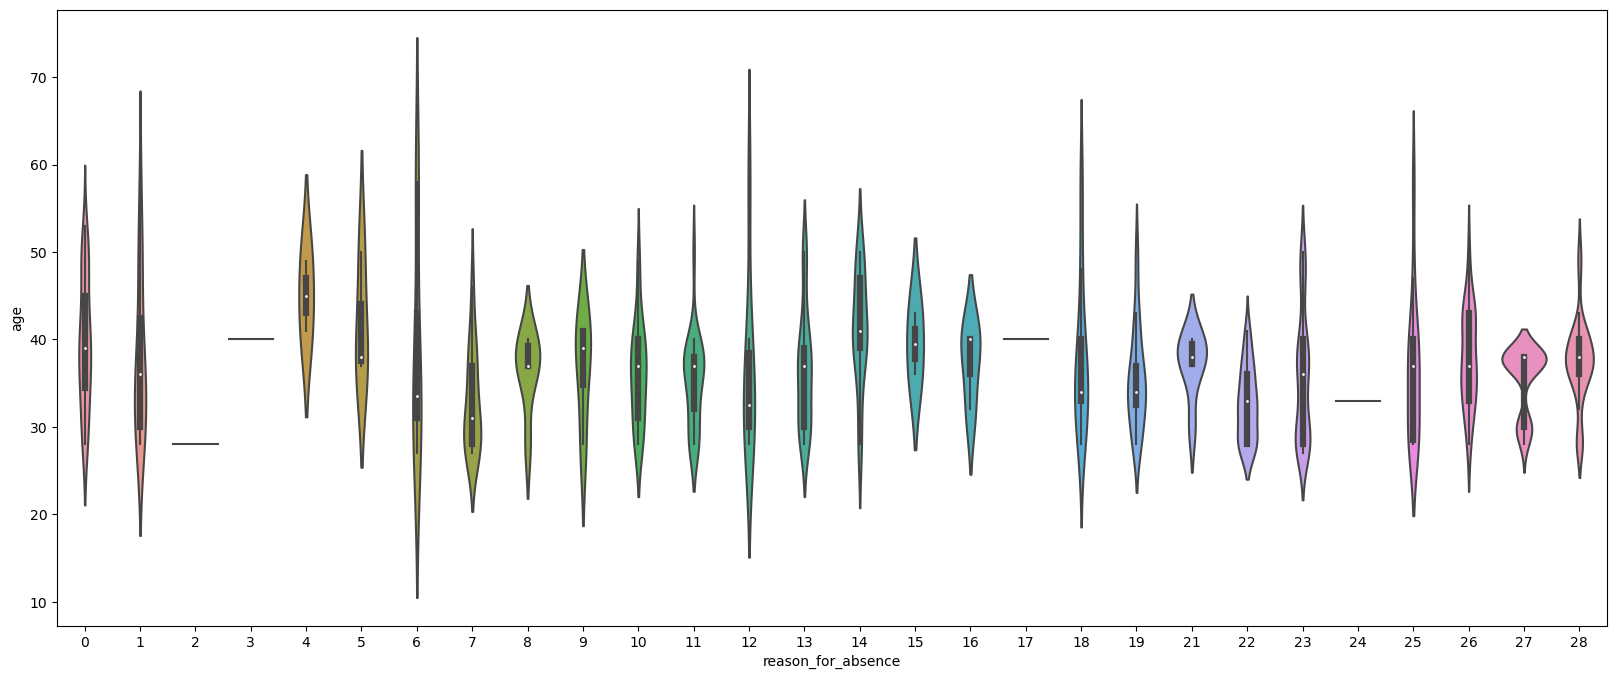

In [104]:
# violin plot of reason for absence vs age
plt.figure(figsize=(20,8))
sns.violinplot(x='reason_for_absence', y='age', data=preprocessed_data)

In light of the previously performed analysis, you can conclude that age has no impact on the employees' absenteeism.

## Investigating the Impact of Education on Reason for Absence

We will analyze the existing relationship between the Reason for absence and Education columns. You will start by looking at the percentage of employees with a certain educational degree, and then relate those numbers to the
various reasons for absence.

First check the percentage of employees in the data that hold a certain degree.

In [105]:
# compute percentage of employees per education level
education_types = ['high_school', 'graduate', 'postgraduate', 'master_phd']
counts = preprocessed_data['education'].value_counts()
percentages = preprocessed_data['education'].value_counts(normalize=True)
for educ_type in education_types:
    print(f'Education type: {educ_type:12s}\
            | Counts : {counts[educ_type]:6.0f}\
            | Percentage: {100*percentages[educ_type]:4.1f}')

Education type: high_school             | Counts :    611            | Percentage: 82.6
Education type: graduate                | Counts :     46            | Percentage:  6.2
Education type: postgraduate            | Counts :     79            | Percentage: 10.7
Education type: master_phd              | Counts :      4            | Percentage:  0.5


You can see that most of the employees in the data have a high school degree (82.6%), which means that the data is **highly biased** toward these employees.

<AxesSubplot:xlabel='education', ylabel='absenteeism_time_in_hours'>

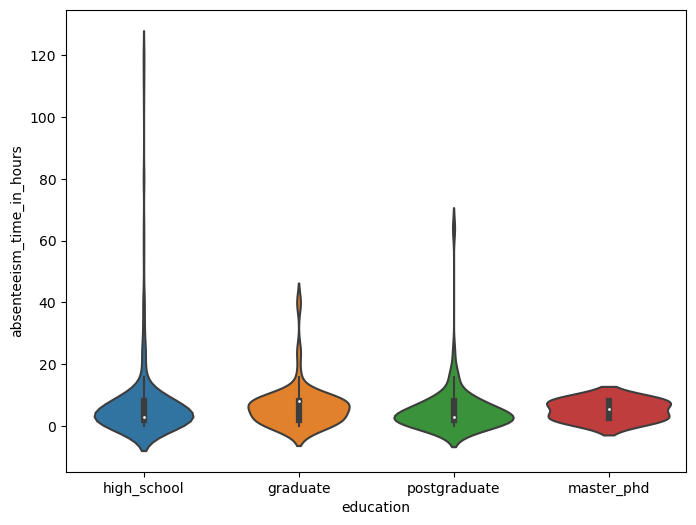

In [106]:
# distribution of absence hours, based on education level
plt.figure(figsize=(8,6))
sns.violinplot(x='education', y='absenteeism_time_in_hours',\
               data=preprocessed_data,\
               order=['high_school', 'graduate', 'postgraduate', 'master_phd'])

It seems most of the extreme cases of absence are among employees with lower education levels. Compute the mean and standard deviation of the absence duration for the different levels of education.

In [108]:
# compute mean and standard deviation of absence hours
for educ_type in education_types:
    mask = preprocessed_data.education == educ_type
    hours = preprocessed_data.absenteeism_time_in_hours[mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f'Education type: {educ_type:12s} | Mean : {mean:.03f} | Stddev: {stddev:.03f}')

Education type: high_school  | Mean : 7.190 | Stddev: 14.259
Education type: graduate     | Mean : 6.391 | Stddev: 6.754
Education type: postgraduate | Mean : 5.266 | Stddev: 7.963
Education type: master_phd   | Mean : 5.250 | Stddev: 3.202


You can see that both the mean and standard deviation of the hours of absence are decreasing, meaning that highly educated employees tend to have shorter absences. Of course, a higher degree of education is not a cause for such a
phenomenon and is more of an indication of it.

Now, check the reasons for absence based on the education level.

<AxesSubplot:xlabel='count', ylabel='reason_for_absence'>

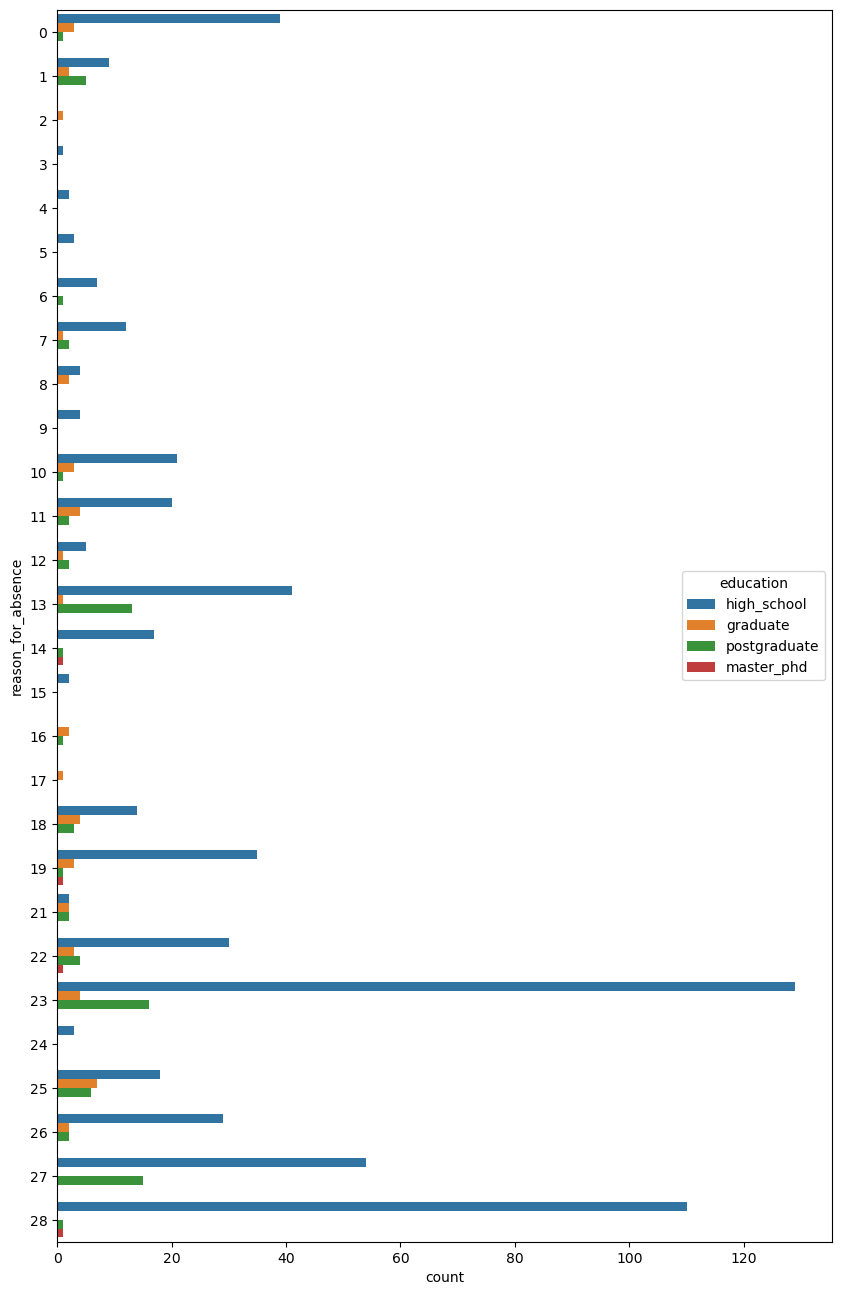

In [109]:
# plot reason for absence, based on education level
plt.figure(figsize=(10, 16))
sns.countplot(data=preprocessed_data, y='reason_for_absence', hue='education',\
              hue_order=['high_school', 'graduate', 'postgraduate', 'master_phd'])

From the preceding plot, you can observe that most of the absences relate to employees with a high_school level of education. This is, of course, due to the fact that most of the employees only have a high school degree. Furthermore, from our analysis, we saw that most of the absences that consisted of a greater number of hours were among employees with a high_school education level.

One question that comes to mind is whether the probability of being absent for more than one working week (40 hours) is greater for employees with a high school degree compared to graduates. In order to address this question, use the definition of conditional probability:

![cond_prob_extreme_absence.png](../../img/pictures/cond_prob_extreme_absence.png)

In [110]:
# define threshold for extreme hours of absenteeism and get total number of entries
threshold = 40
total_entries = len(preprocessed_data)

# find entries with Education == high_school
high_school_mask = preprocessed_data.education == 'high_school'

# find entries with absenteeism time in hours more than threshold
extreme_mask = preprocessed_data.absenteeism_time_in_hours > threshold

# compute probability of having high school degree
prob_high_school = len(preprocessed_data[high_school_mask]) / total_entries

# compute probability of having more than high school degree
prob_graduate = len(preprocessed_data[~high_school_mask]) / total_entries

# compute probability of having high school and being absent for more than "threshold" hours
prob_extreme_high_school = len(preprocessed_data[high_school_mask & extreme_mask]) / total_entries

# compute probability of having more than high school and being absent for more than "threshold" hours
prob_extreme_graduate = len(preprocessed_data[~high_school_mask & extreme_mask]) / total_entries

# compute and print conditional probabilities
cond_prob_extreme_high_school = prob_extreme_high_school / prob_high_school
cond_prob_extreme_graduate = prob_extreme_graduate/prob_graduate
print(f'P(extreme absence | degree = high_school) = {100*cond_prob_extreme_high_school:3.2f}')
print(f'P(extreme absence | degree != high_school) = {100*cond_prob_extreme_graduate:3.2f}')
preprocessed_data.head().T

P(extreme absence | degree = high_school) = 2.29
P(extreme absence | degree != high_school) = 0.78


,0,1,2,3,4
id,11,36,3,7,11
reason_for_absence,26,0,23,7,23
month_of_absence,July,July,July,July,July
day_of_the_week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
seasons,Spring,Spring,Spring,Spring,Spring
transportation_expense,289,118,179,279,289
distance_from_residence_to_work,36,13,51,5,36
service_time,13,18,18,14,13
age,33,50,38,39,33
work_load_average/day_,239.554,239.554,239.554,239.554,239.554


From the preceding computations, we can see that the probability of having an absence of more than 40 hours for employees with a high school education degree is 2.29%, which is approximately three times greater than the same probability for employees with a university degree (0.78%).

# Transportation Costs and Distance to Work Factors

Two possible indicators for absenteeism may also be the distance between home and work (the **Distance from Residence to Work** column) and transportation costs (the **Transportation expense** column). Employees who have to travel longer, or whose costs for commuting to work are high, might be more prone to absenteeism.

We will use the seaborn `jointplot()` function, which not only produces **the regression plot** between the two variables but also estimates their **distribution**.

We will investigate the relationship between these variables and the absence time in hours. Since we do not believe the aforementioned factors might be indicative of disease problems, we will not consider a possible relationship with the **Reason for absence** column.

<Figure size 1000x600 with 0 Axes>

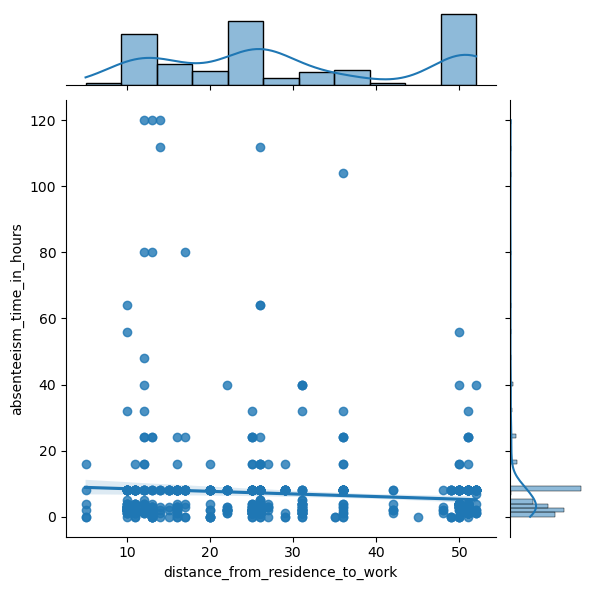

<Figure size 1000x600 with 0 Axes>

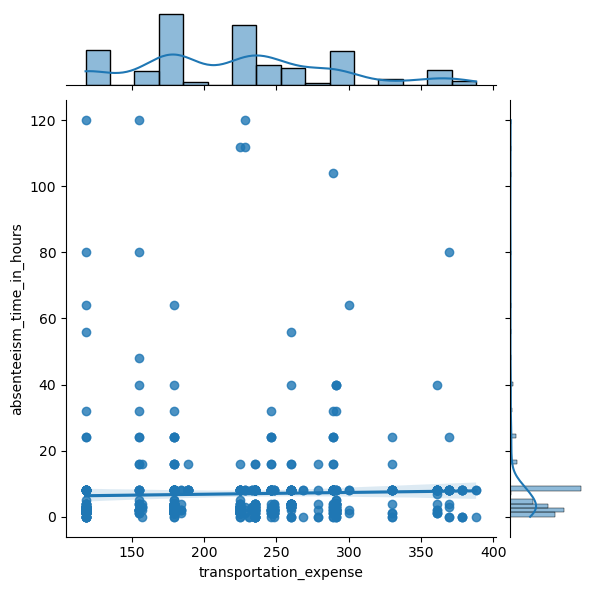

In [111]:
# plot transportation costs and distance to work against hours

plt.figure(figsize=(10, 6))
sns.jointplot(x='distance_from_residence_to_work',
              y='absenteeism_time_in_hours',
              data=preprocessed_data, kind='reg')

plt.figure(figsize=(10, 6))
sns.jointplot(x='transportation_expense',
              y='absenteeism_time_in_hours',
              data=preprocessed_data, kind='reg')

As we can see, the distributions of **Distance from Residence to Work** and **Transportation expense** look close to normal distributions, while the **absenteeism time in hours** is heavily right-skewed. This makes the comparison between the variables **difficult to interpret**. 

One solution to this problem is to transform the data into something close to a normal distribution. A handy way to
perform this transformation is to use the **Box-Cox or Yeo-Johnson transformations**.

The **Box-Cox transformation** is defined as follows:
![box_cox.png](../../img/pictures/box_cox.png)

The optimal value of the parameter λ is the one that results in the best approximation of a normal distribution. Note that the Box-Cox transformation fails if the data assumes negative values or zero. If this is the case, the **Yeo-Johnson transformation** can be used:

![yeo_johnson.png](../../img/pictures/yeo_johnson.png)

In Python, both transformations can be found in the `scipy.stats` module (in the `boxcox()` and `yeojohnson()` functions, respectively).

Since the Absenteeism time in hours column contains zeros, we will apply the **Yeo-Johnson transformation** in order to reproduce previous plots.

<Figure size 1000x600 with 0 Axes>

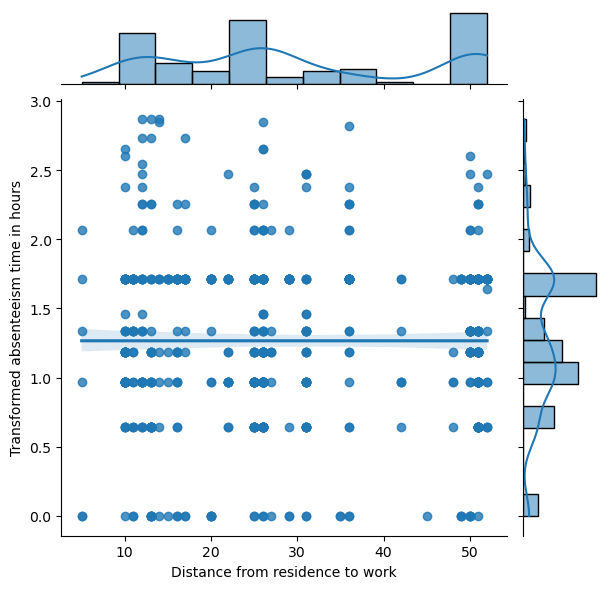

<Figure size 1000x600 with 0 Axes>

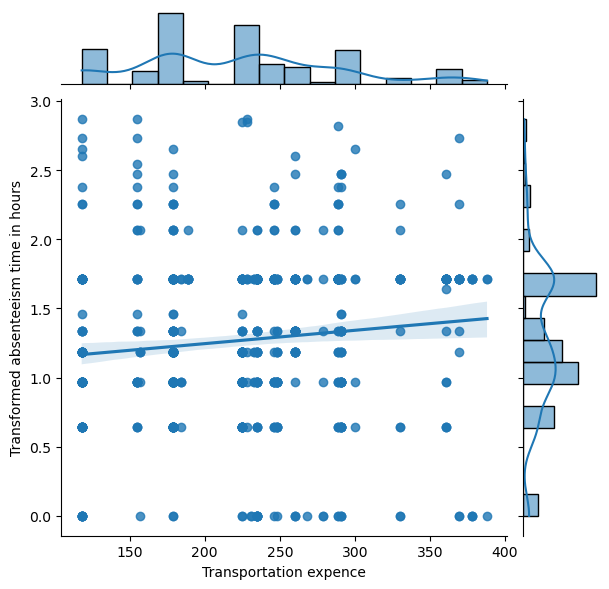

In [116]:
# run Yeo-Johnson transformation and recreate previous plots

from scipy.stats import yeojohnson

hours = yeojohnson(preprocessed_data.absenteeism_time_in_hours.apply(float))
distances = preprocessed_data.distance_from_residence_to_work
expenses = preprocessed_data.transportation_expense

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind='reg')
ax.set_axis_labels('Distance from residence to work', 'Transformed absenteeism time in hours')

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind='reg')
ax.set_axis_labels('Transportation expence', 'Transformed absenteeism time in hours')

We can also produce **kernel density estimation plots** (that is, plots that help us visualize the probability density functions of continuous variables) by just changing the type of the `jointplot()` function to kde.

<Figure size 1000x600 with 0 Axes>

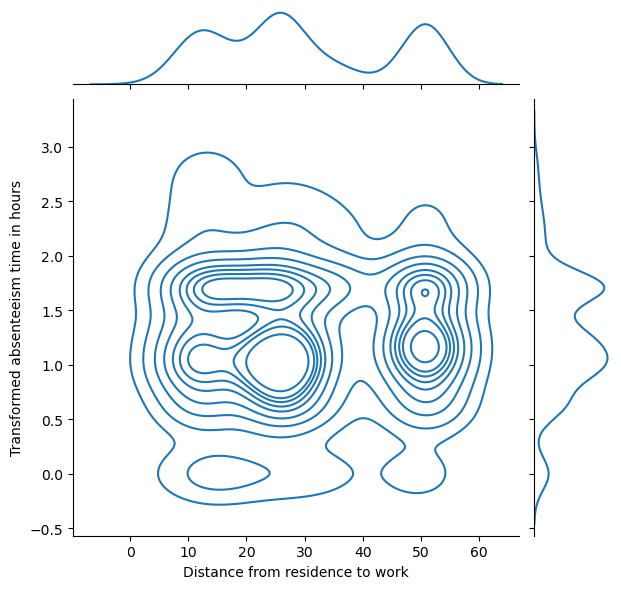

<Figure size 1000x600 with 0 Axes>

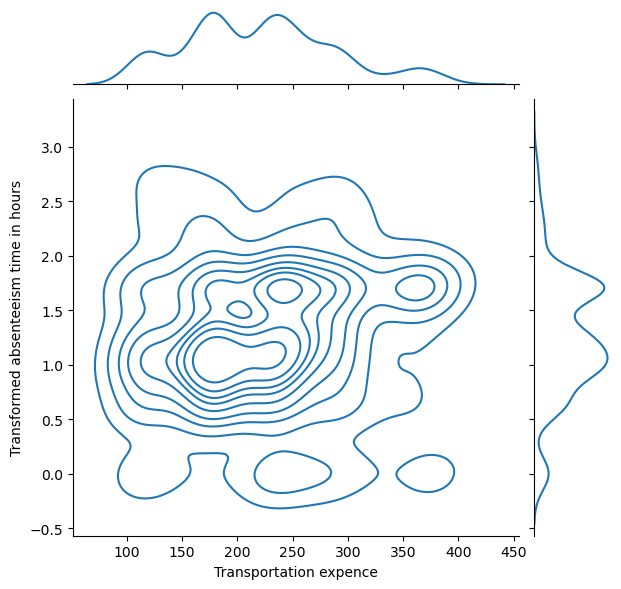

In [117]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind='kde')
ax.set_axis_labels('Distance from residence to work', 'Transformed absenteeism time in hours')

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind='kde')
ax.set_axis_labels('Transportation expence', 'Transformed absenteeism time in hours')

On previous plots we can see that the **regression line** between the variables is almost flat for the Distance from Residence to Work column (which is a clear indicator of zero correlation) but has a slight upward slope for the Transportation Expense column. Therefore, we can expect a small positive correlation.

In [118]:
# investigate correlation between the columns

distance_corr = pearsonr(hours[0], distances)
expenses_corr = pearsonr(hours[0], expenses)
print(f"Distances correlation: corr={distance_corr[0]:.3f}, \
pvalue={distance_corr[1]:.3f}")
print(f"Expenses comparison: corr={expenses_corr[0]:.3f}, \
pvalue={expenses_corr[1]:.3f}")

Distances correlation: corr=-0.000, pvalue=0.999
Expenses comparison: corr=0.113, pvalue=0.002


These results confirm our observation, stating that there is a **slight positive correlation** between **Transportation expense** and **Absenteeism time in hours**.

# Temporal Factors

Factors such as day of the week and month may also be indicators for absenteeism. For instance, employees might prefer to have their medical examinations on Friday when the workload is lower, and it is closer to the weekend. We will analyze the impact of the Day of the week and Month of absence columns, and their impact on the employees' absenteeism.

Text(0.5, 1.0, 'Number of absences per month')

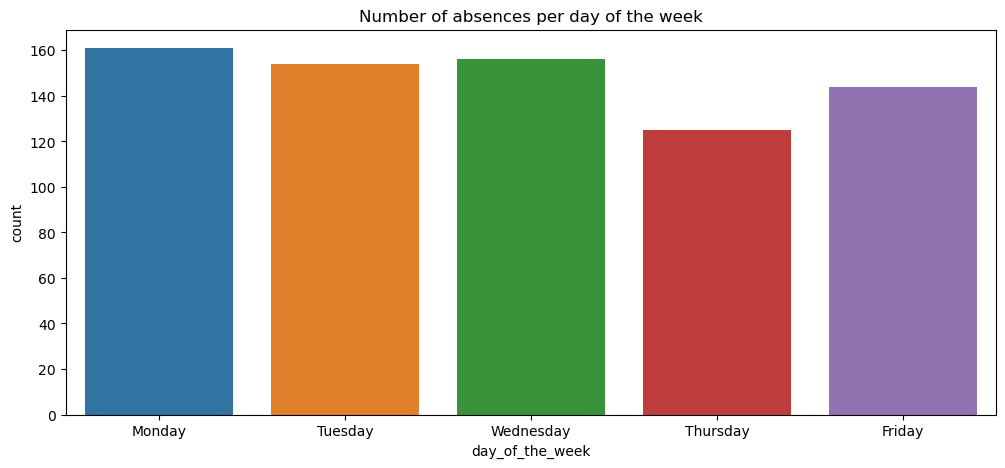

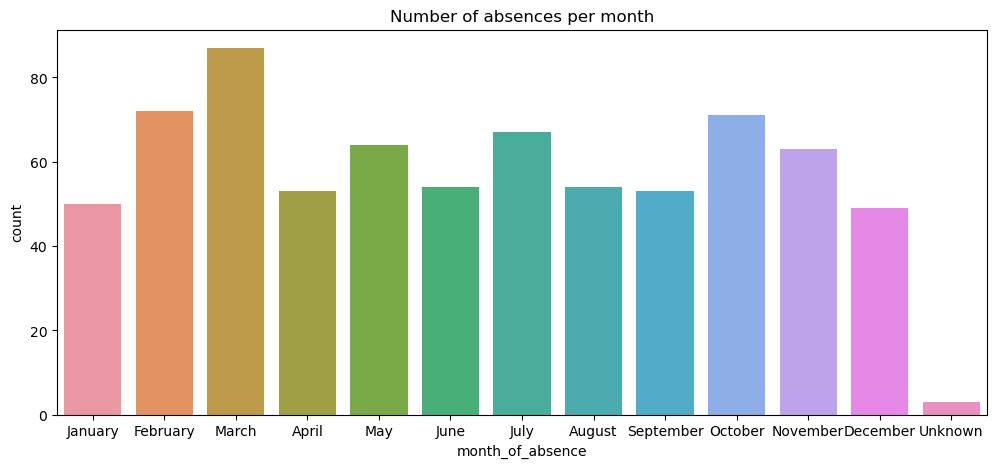

In [121]:
# count entries per day of the week and month

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, x='day_of_the_week',
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
ax.set_title('Number of absences per day of the week')

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, x='month_of_absence', 
                   order=['January', 'February', 'March', 'April', 
                          'May', 'June', 'July', 'August', 'September', 
                          'October', 'November', 'December', 'Unknown'])
ax.set_title('Number of absences per month')

From the preceding plots, we can't really see a substantial difference between the different days of the week or months. It seems that fewer absences occur on Thursday, while the month with the most absences is March, but it is hard to say that the difference is significant. Now, let's focus on the distribution of absence hours among the days of the week and the months of the year.

## Investigating Absence Hours, Based on the Day of the Week and the Month of the Year

<AxesSubplot:xlabel='month_of_absence', ylabel='absenteeism_time_in_hours'>

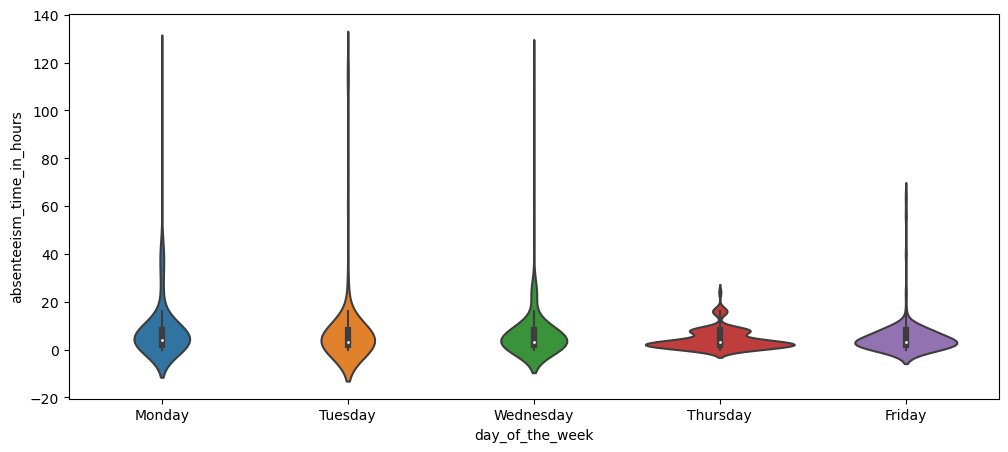

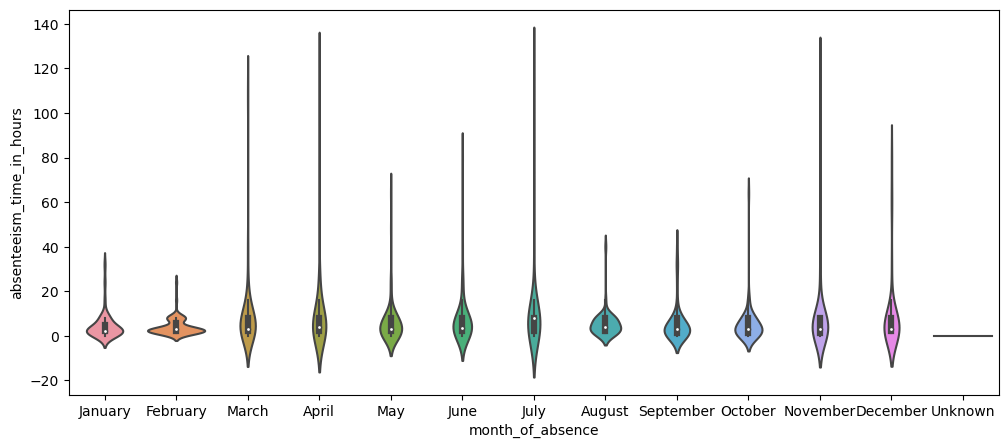

In [122]:
# analyze average distribution of absence hours

plt.figure(figsize=(12,5))
sns.violinplot(x='day_of_the_week', y='absenteeism_time_in_hours',
               data=preprocessed_data, order=['Monday', 'Tuesday','Wednesday', 
                                              'Thursday', 'Friday'])

plt.figure(figsize=(12,5))
sns.violinplot(x='month_of_absence', y='absenteeism_time_in_hours',
               data=preprocessed_data, order=['January', 'February', 'March', 'April', 
                                              'May', 'June', 'July', 'August', 'September', 
                                              'October', 'November', 'December', 'Unknown'])

In [123]:
# compute mean and standard deviation of absence hours per day of the week

dows = ['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday']

for dow in dows:
    mask = preprocessed_data.day_of_the_week == dow
    hours = preprocessed_data.absenteeism_time_in_hours[mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f'Day of the week: {dow:10s} | Mean : {mean:.03f} | Stddev: {stddev:.03f}')

Day of the week: Monday     | Mean : 9.248 | Stddev: 15.973
Day of the week: Tuesday    | Mean : 7.981 | Stddev: 18.027
Day of the week: Wednesday  | Mean : 7.147 | Stddev: 13.268
Day of the week: Thursday   | Mean : 4.424 | Stddev: 4.266
Day of the week: Friday     | Mean : 5.125 | Stddev: 7.911


In [124]:
# compute mean and standard deviation of absence hours per day of the month

months = ['January', 'February', 'March', 'April', 
          'May', 'June', 'July', 'August', 'September', 
          'October', 'November', 'December', 'Unknown']

for month in months:
    mask = preprocessed_data.month_of_absence == month
    hours = preprocessed_data.absenteeism_time_in_hours[mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f'Month: {month:10s} | Mean : {mean:8.03f} | Stddev: {stddev:8.03f}')

Month: January    | Mean :    4.440 | Stddev:    5.786
Month: February   | Mean :    4.083 | Stddev:    3.710
Month: March      | Mean :    8.793 | Stddev:   16.893
Month: April      | Mean :    9.094 | Stddev:   18.024
Month: May        | Mean :    6.250 | Stddev:   10.314
Month: June       | Mean :    7.611 | Stddev:   12.359
Month: July       | Mean :   10.955 | Stddev:   21.547
Month: August     | Mean :    5.333 | Stddev:    5.749
Month: September  | Mean :    5.509 | Stddev:    8.407
Month: October    | Mean :    4.915 | Stddev:    8.055
Month: November   | Mean :    7.508 | Stddev:   16.121
Month: December   | Mean :    8.449 | Stddev:   16.049
Month: Unknown    | Mean :    0.000 | Stddev:    0.000


Observe that the average duration of the absences is slightly shorter on Thursday (4.424 hours), while absences during July have the longest average duration (10.955 hours). We will check whether these values are **statistically significant** — that is, whether there is a statistically significant difference regarding
the rest of the days/months.

In [126]:
# perform statistical test for avg duration difference

thursday_mask = preprocessed_data.day_of_the_week == 'Thursday'
july_mask = preprocessed_data.month_of_absence == 'July'
thursday_data = preprocessed_data.absenteeism_time_in_hours[thursday_mask]
no_thursday_data = preprocessed_data.absenteeism_time_in_hours[~thursday_mask]
july_data = preprocessed_data.absenteeism_time_in_hours[july_mask]
no_july_data = preprocessed_data.absenteeism_time_in_hours[~july_mask]

thursday_res = ttest_ind(thursday_data, no_thursday_data)
july_res = ttest_ind(july_data, no_july_data)

print(f'Thursday test result: statistic={thursday_res[0]:.3f}, pvalue={thursday_res[1]:.3f}')
print(f'July test result: statistic={july_res[0]:.3f}, pvalue={july_res[1]:.3f}')

Thursday test result: statistic=-2.307, pvalue=0.021
July test result: statistic=2.605, pvalue=0.009


In [129]:
# summarize and visualize the data

preprocessed_data.head().T

,0,1,2,3,4
id,11,36,3,7,11
reason_for_absence,26,0,23,7,23
month_of_absence,July,July,July,July,July
day_of_the_week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
seasons,Spring,Spring,Spring,Spring,Spring
transportation_expense,289,118,179,279,289
distance_from_residence_to_work,36,13,51,5,36
service_time,13,18,18,14,13
age,33,50,38,39,33
work_load_average/day_,239.554,239.554,239.554,239.554,239.554


<AxesSubplot:>

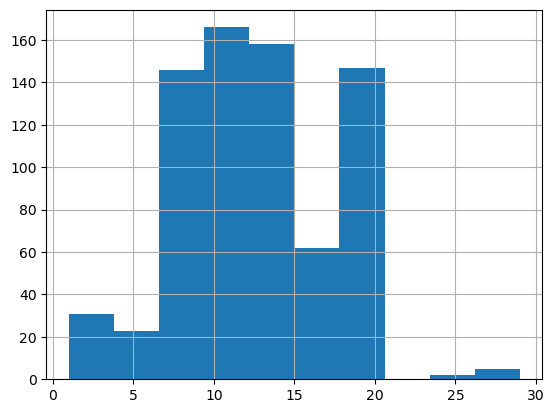

In [130]:
preprocessed_data.service_time.hist()

Since the p-values from both the statistical tests are below the critical value of 0.05, we can conclude the following:
- There is a statistically significant difference between Thursdays and other days of the week. Absences on Thursday have a shorter duration, on average.
- Absences during July are the longest over the year. Also, in this case, we can reject the null hypothesis of having no difference.

We can conclude that our initial observations about the difference in absenteeism during the month of July and on
Thursdays are correct. Of course, **we cannot claim that this is the cause**, but only state that certain trends exist in the data.

# Analyzing the Service Time and Son Columns
## Activity

We will explore the impact of two additional columns: Service time and Son.

Analyze the distribution of the **Service time** column by creating a **Kernel density estimation plot** (use the `seaborn.kdeplot()` function). Perform a hypothesis test for normality (that is, a Kholmogorov-Smirnov test with the `scipy.stats.kstest()` function).

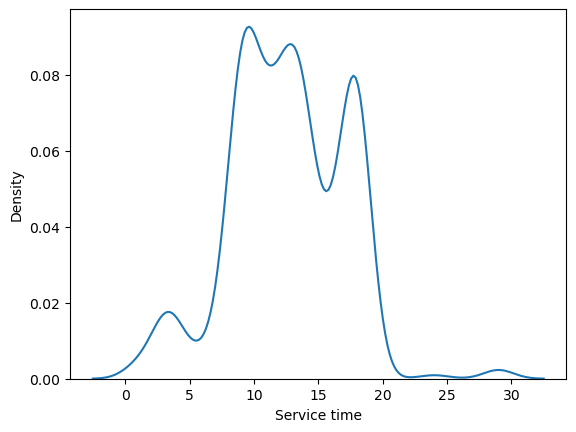

In [141]:
from scipy.stats import kstest
from scipy.stats import norm

service_time = preprocessed_data.service_time

plt.figure()
ax = sns.kdeplot(data=service_time)
ax.set_xlabel('Service time');

In [142]:
ks_service_time = kstest(preprocessed_data.service_time, 'norm')

print(f'Hypothesis test for normality: statistics={ks_service_time[0]:.3f}, pvalue={ks_service_time[1]:.3f}')

Hypothesis test for normality: statistics=0.989, pvalue=0.000


As soon as p-value is lower than threshold (0.05), we reject the null hypotesis and conclude that the data are not distributed according to the standard normal.

Create a violin plot of the **Service time** column and the **Reason for absence** column. Draw a conclusion about the observed relationship.

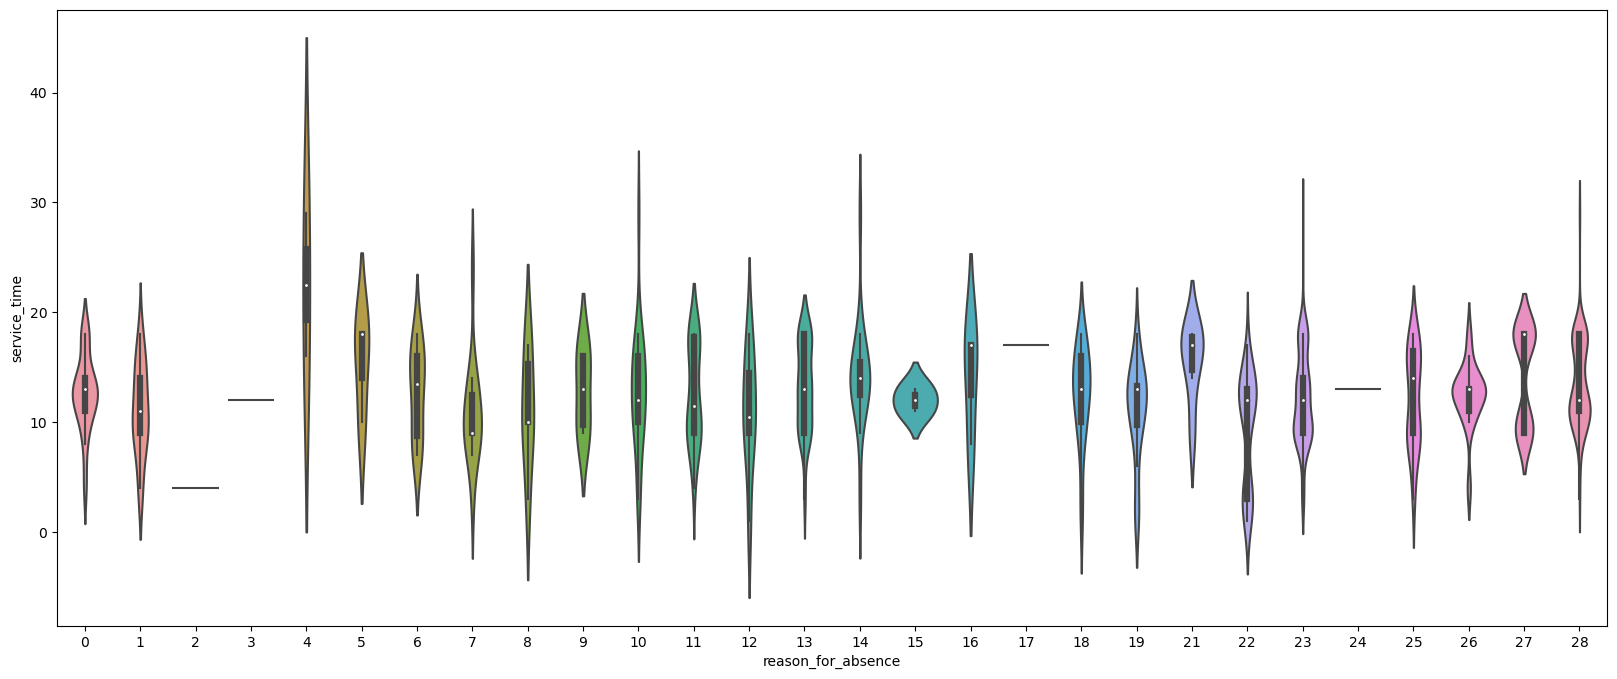

In [143]:
# violin plot of reason for absence vs service time

plt.figure(figsize=(20,8))
sns.violinplot(x='reason_for_absence', y='service_time', data=preprocessed_data);

Create a correlation plot between the **Service time** and **Absenteeism time in hours** columns.

<Figure size 1000x600 with 0 Axes>

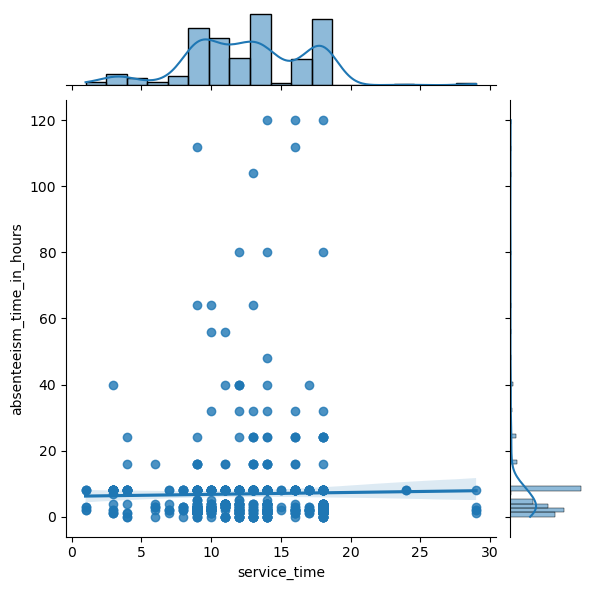

<Figure size 1000x600 with 0 Axes>

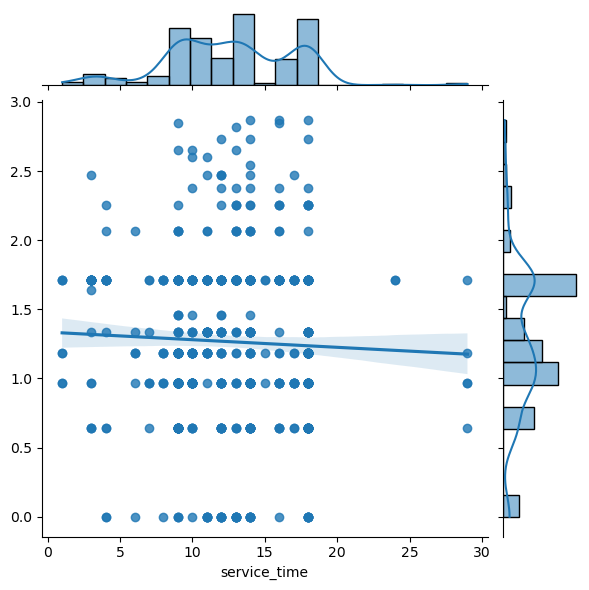

In [146]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='service_time',
              y='absenteeism_time_in_hours',
              data=preprocessed_data, kind='reg')

hours = yeojohnson(preprocessed_data.absenteeism_time_in_hours.apply(float))
plt.figure(figsize=(10, 6))
sns.jointplot(x='service_time',
              y=hours[0],
              data=preprocessed_data, kind='reg')

Analyze the distributions of **Absenteeism time in hours** for employees with a different number of children (the **Son** column).

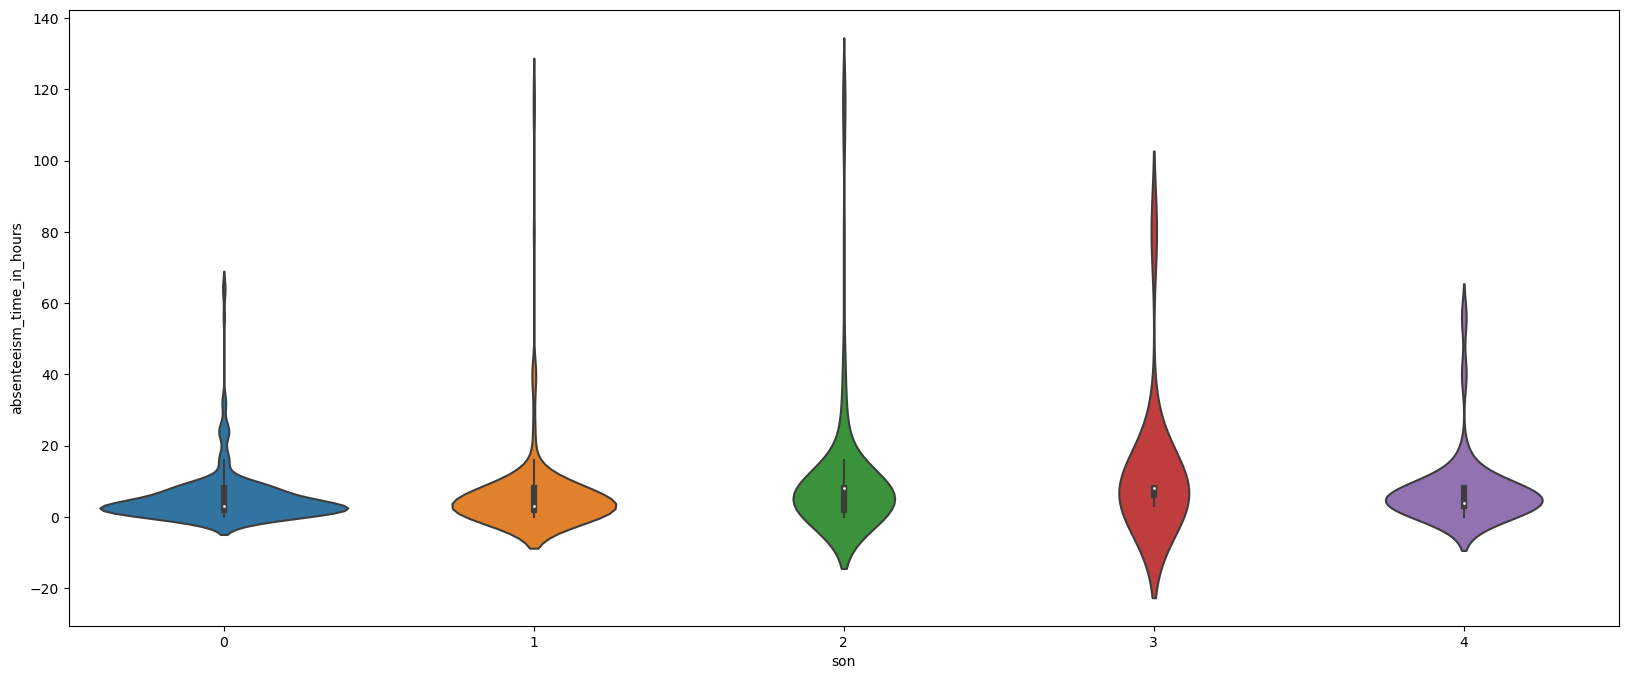

In [149]:
# violin plot of reason for absence vs service time

plt.figure(figsize=(20,8))
sns.violinplot(x='son', y='absenteeism_time_in_hours', data=preprocessed_data);

In [150]:
preprocessed_data.son.value_counts(normalize=True)

0    0.402703
1    0.309459
2    0.210811
4    0.056757
3    0.020270
Name: son, dtype: float64